## 12/12/2025

- we have two types of scaling
    - Z-score (Standardization)
    - Min-MAx scalar(Normalization)

## Z-Score

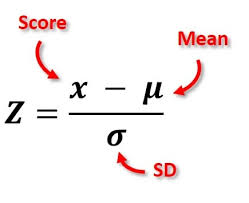

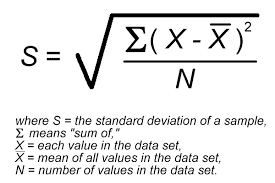

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_path=r"C:\Users\SNEHA\OneDrive\Desktop\DS_My notes\categorical pro\VisaDataset.csv"
visa_df=pd.read_csv(file_path)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [5]:
cat=visa_df.select_dtypes(include=['object', 'category']).columns
num=visa_df.select_dtypes(exclude=['object']).columns


In [6]:
cat


Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [7]:
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [8]:
#Step-1:take prevailing data
#step-2: calcuate mena of the data
#S-3:   cal stnd of the data
#s-4:  Nr= data_mean  (Stp1-step2)
#S-5:  Z_wage=Nr/Std= step/step3
#s-6:  craete a new column visa_df['z_wage']=z_wage

In [12]:
wage_data=visa_df['prevailing_wage']
wage_mean=wage_data.mean()
wage_std=wage_data.std()
Nr=wage_data-wage_mean
z_wage=Nr/wage_std
visa_df['z_wage']=z_wage

In [21]:
Nr

0        -73863.611692
1          8969.835408
2         48541.045408
3          8978.215408
4         75451.575408
             ...      
25475      2636.755408
25476    204718.975408
25477     71843.035408
25478     11698.955408
25479     -3578.904592
Name: prevailing_wage, Length: 25480, dtype: float64

In [15]:
z_wage

0       -1.398510
1        0.169832
2        0.919060
3        0.169991
4        1.428576
           ...   
25475    0.049923
25476    3.876083
25477    1.360253
25478    0.221504
25479   -0.067762
Name: prevailing_wage, Length: 25480, dtype: float64

(array([6038., 5504., 5681., 4551., 2334.,  624.,  373.,  240.,  114.,
          21.]),
 array([-1.4096819 , -0.80530353, -0.20092515,  0.40345322,  1.0078316 ,
         1.61220997,  2.21658834,  2.82096672,  3.42534509,  4.02972346,
         4.63410184]),
 <BarContainer object of 10 artists>)

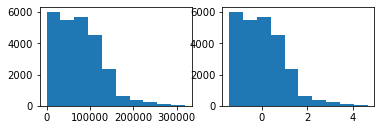

In [17]:
plt.subplot(2,2,1).hist(wage_data)
plt.subplot(2,2,2).hist(z_wage)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e4fc7c0e20>,
 'caps': [<matplotlib.lines.Line2D at 0x1e4fc7d0400>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e4fc7c0b50>],
 'medians': [<matplotlib.lines.Line2D at 0x1e4fc7d09a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e4fc7d0c70>],
 'means': []}

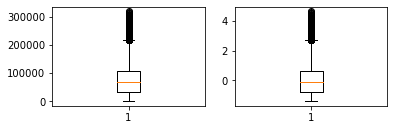

In [18]:
plt.subplot(2,2,1).boxplot(wage_data)
plt.subplot(2,2,2).boxplot(z_wage)

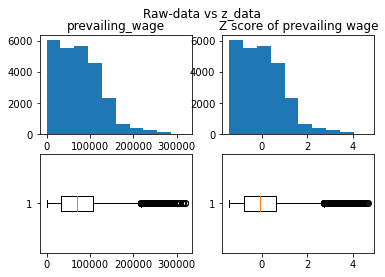

In [20]:
plt.figure(figsize=(6,4))
plt.suptitle('Raw-data vs z_data')
plt.subplot(2,2,1).hist(wage_data)
plt.title('prevailing_wage')
plt.subplot(2,2,2).hist(z_wage)
plt.title('Z score of prevailing wage')
plt.subplot(2,2,3).boxplot(wage_data,vert=False)
plt.subplot(2,2,4).boxplot(z_wage,vert=False)
plt.show()

**Standarization**

- sklearn
    - prepocessing
    - Satndarization

In [22]:
#s-1: import the method
#s-2: save the method
#s-3: apply fit tranform

In [27]:
visa_df['prevailing_wage'] #series

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

In [25]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
wage_ss=ss.fit_transform(visa_df[['prevailing_wage']])  # if here only [] is given it ask for 2 args so---[[ ]]
visa_df['wage_ss']=wage_ss

In [26]:
visa_df[['prevailing_wage']]  #dataframe

,prevailing_wage
0,592.2029
1,83425.6500
2,122996.8600
3,83434.0300
4,149907.3900
...,...
25475,77092.5700
25476,279174.7900
25477,146298.8500
25478,86154.7700


In [28]:
visa_df[['prevailing_wage','z_wage','wage_ss']]

,prevailing_wage,z_wage,wage_ss
0,592.2029,-1.398510,-1.398537
1,83425.6500,0.169832,0.169835
2,122996.8600,0.919060,0.919079
3,83434.0300,0.169991,0.169994
4,149907.3900,1.428576,1.428604
...,...,...,...
25475,77092.5700,0.049923,0.049924
25476,279174.7900,3.876083,3.876159
25477,146298.8500,1.360253,1.360280
25478,86154.7700,0.221504,0.221509


In [29]:
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,z_wage,wage_ss
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,1,-1.398510,-1.398537
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,0,0.169832,0.169835
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,1,0.919060,0.919079
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,1,0.169991,0.169994
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,0,1.428576,1.428604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,0,0.049923,0.049924
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,0,3.876083,3.876159
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,0,1.360253,1.360280
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,0,0.221504,0.221509


In [30]:
visa_df['prevailing_wage']

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

In [31]:
visa_df['prevailing_wage'].values     # converting to values to reshape

array([   592.2029,  83425.65  , 122996.86  , ..., 146298.85  ,
        86154.77  ,  70876.91  ])

In [32]:
visa_df['prevailing_wage'].values.reshape(-1,1)

array([[   592.2029],
       [ 83425.65  ],
       [122996.86  ],
       ...,
       [146298.85  ],
       [ 86154.77  ],
       [ 70876.91  ]])

In [33]:
#or

ss=StandardScaler()
wage_ss=ss.fit_transform(visa_df['prevailing_wage'].values.reshape(-1,1))  # if here only [] is given it ask for 2 args so---[[ ]]
visa_df['wage_ss']=wage_ss

## Min- Max Scaler

In [35]:
#S-1:read teh data
#s-2:Cal min
#s-3:cal max
#s-4: Nr=step1-step2
#s-5: Dr=step3-step2
#S-6: Nr/Dr
#s-7: visa_df['wage_min_max']=Nr/Dr

In [42]:
wage_data=visa_df['prevailing_wage']
wage_min=wage_data.min()
wage_max=wage_data.max()
Nr=wage_data - wage_min
Dr=wage_max - wage_min
Nr/Dr


0        0.001849
1        0.261345
2        0.385312
3        0.261371
4        0.469616
           ...   
25475    0.241505
25476    0.874579
25477    0.458311
25478    0.269895
25479    0.222033
Name: prevailing_wage, Length: 25480, dtype: float64

In [43]:
max(Nr/Dr),min(Nr/Dr)

(1.0, 0.0)

In [47]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
wage_mms=mms.fit_transform(visa_df[['prevailing_wage']])
wage_mms

array([[0.00184853],
       [0.2613452 ],
       [0.385312  ],
       ...,
       [0.45831136],
       [0.26989486],
       [0.22203311]])